In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
pip install d2l==0.17.0 # for testing

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


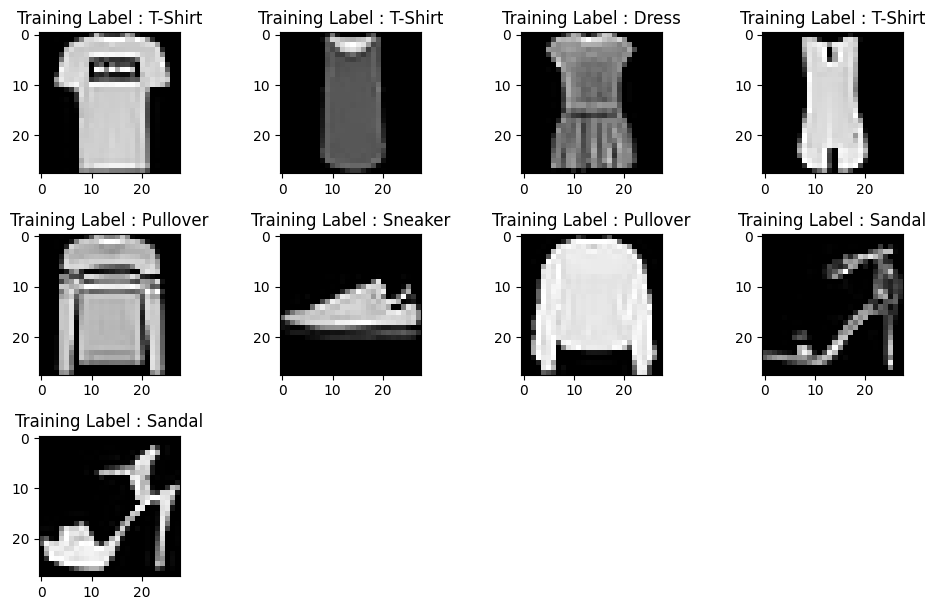

In [ ]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [ ]:
input_size = 784
out_size = 10

In [ ]:
## Define the model
################ Your code ############
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, out_size)
)
#######################################

In [ ]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
#######################################

In [ ]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)} in epoch {e + 1}")

Training loss: 0.8859119927768768 in epoch 1
Training loss: 0.5124212528374403 in epoch 2
Training loss: 0.4566255709700493 in epoch 3
Training loss: 0.42531782310845245 in epoch 4
Training loss: 0.40054182994213183 in epoch 5
Training loss: 0.3830184656610367 in epoch 6
Training loss: 0.36906610977357385 in epoch 7
Training loss: 0.3563021350580492 in epoch 8
Training loss: 0.34560003561347025 in epoch 9
Training loss: 0.3356428224283622 in epoch 10


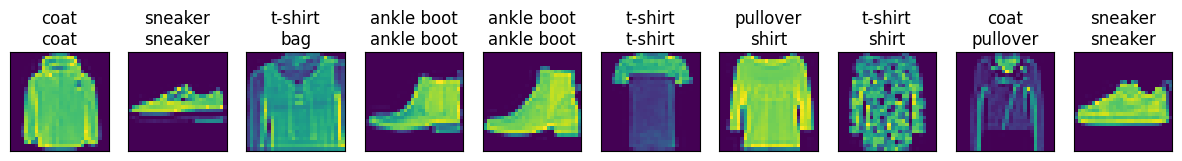

In [ ]:
## Test your model
from d2l import torch as d2l
d2l.predict_ch3(model,testloader,n = 10)

## Part b

In [ ]:
# new model:
new_input_size = 784
new_out_size = 10
new_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(new_input_size, 512), # increased neurons in the first layer
    nn.ReLU(),
    nn.Linear(512, 256), # additional layer with more neurons
    nn.ReLU(),
    nn.Linear(256, 128), # extra layer
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, new_out_size)
)

new_criterion = nn.CrossEntropyLoss()
new_optimizer = optim.SGD(new_model.parameters(), lr=0.01)



In [ ]:
print(new_model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=128, bias=True)
  (6): ReLU()
  (7): Linear(in_features=128, out_features=64, bias=True)
  (8): ReLU()
  (9): Linear(in_features=64, out_features=10, bias=True)
)


Epoch 1/40, Train Loss: 1.4998, Test Loss: 0.8086
Epoch 2/40, Train Loss: 0.6688, Test Loss: 0.6517
Epoch 3/40, Train Loss: 0.5239, Test Loss: 0.6198
Epoch 4/40, Train Loss: 0.4588, Test Loss: 0.4698
Epoch 5/40, Train Loss: 0.4191, Test Loss: 0.4588
Epoch 6/40, Train Loss: 0.3899, Test Loss: 0.4222
Epoch 7/40, Train Loss: 0.3677, Test Loss: 0.4341
Epoch 8/40, Train Loss: 0.3512, Test Loss: 0.4129
Epoch 9/40, Train Loss: 0.3363, Test Loss: 0.3855
Epoch 10/40, Train Loss: 0.3209, Test Loss: 0.3740
Epoch 11/40, Train Loss: 0.3108, Test Loss: 0.3732
Epoch 12/40, Train Loss: 0.2982, Test Loss: 0.3707
Epoch 13/40, Train Loss: 0.2899, Test Loss: 0.3612
Epoch 14/40, Train Loss: 0.2810, Test Loss: 0.3935
Epoch 15/40, Train Loss: 0.2720, Test Loss: 0.3915
Epoch 16/40, Train Loss: 0.2633, Test Loss: 0.3672
Epoch 17/40, Train Loss: 0.2563, Test Loss: 0.3364
Epoch 18/40, Train Loss: 0.2488, Test Loss: 0.3377
Epoch 19/40, Train Loss: 0.2416, Test Loss: 0.3496
Epoch 20/40, Train Loss: 0.2343, Test Lo

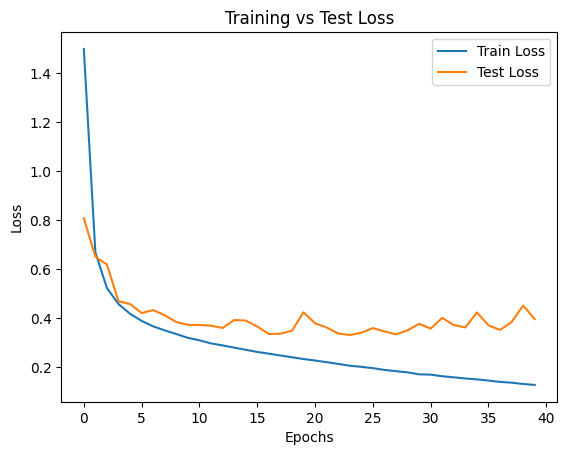

In [ ]:
train_losses = []
test_losses = []

new_epochs = 40 # and increased epochs

for e in range(new_epochs):
    running_loss = 0
    correct = 0
    total = 0
    total_loss = 0

    # Training the model
    new_model.train()
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        new_optimizer.zero_grad()
        output = new_model(images)
        loss = new_criterion(output, labels)
        loss.backward()
        new_optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Testing the model
    with torch.no_grad():
      for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        output = new_model(images)
        loss = new_criterion(output, labels)
        total_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_loss = total_loss / len(testloader)
    test_losses.append(test_loss)


    print(f"Epoch {e+1}/{new_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
# Plotting the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Test Loss')
plt.show()


## Part c

In [ ]:
import torch
from torchvision import datasets, transforms

# Define transformations for data augmentation
transform_train = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load training data with the defined transformations
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load test data with normalization
testset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [ ]:
# the last introduced model:
new_input_size = 784
new_out_size = 10
new_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(new_input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, new_out_size)
)

new_criterion = nn.CrossEntropyLoss()
new_optimizer = optim.SGD(new_model.parameters(), lr=0.01)

Epoch 1/40, Train Loss: 1.5762, Test Loss: 0.9195
Epoch 2/40, Train Loss: 0.7476, Test Loss: 0.6377
Epoch 3/40, Train Loss: 0.5939, Test Loss: 0.5571
Epoch 4/40, Train Loss: 0.5351, Test Loss: 0.5073
Epoch 5/40, Train Loss: 0.4944, Test Loss: 0.4721
Epoch 6/40, Train Loss: 0.4666, Test Loss: 0.4723
Epoch 7/40, Train Loss: 0.4455, Test Loss: 0.4670
Epoch 8/40, Train Loss: 0.4265, Test Loss: 0.4301
Epoch 9/40, Train Loss: 0.4158, Test Loss: 0.4175
Epoch 10/40, Train Loss: 0.4018, Test Loss: 0.4163
Epoch 11/40, Train Loss: 0.3895, Test Loss: 0.4029
Epoch 12/40, Train Loss: 0.3807, Test Loss: 0.4088
Epoch 13/40, Train Loss: 0.3741, Test Loss: 0.3933
Epoch 14/40, Train Loss: 0.3639, Test Loss: 0.3940
Epoch 15/40, Train Loss: 0.3579, Test Loss: 0.3901
Epoch 16/40, Train Loss: 0.3518, Test Loss: 0.3735
Epoch 17/40, Train Loss: 0.3441, Test Loss: 0.3877
Epoch 18/40, Train Loss: 0.3396, Test Loss: 0.3722
Epoch 19/40, Train Loss: 0.3349, Test Loss: 0.3666
Epoch 20/40, Train Loss: 0.3280, Test Lo

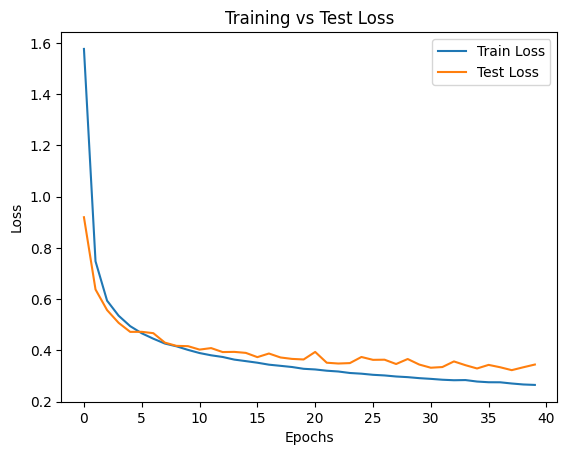

In [ ]:
train_losses = []
test_losses = []

new_epochs = 40 # and increased epochs

for e in range(new_epochs):
    running_loss = 0
    correct = 0
    total = 0
    total_loss = 0

    # Training the model
    new_model.train()
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        new_optimizer.zero_grad()
        output = new_model(images)
        loss = new_criterion(output, labels)
        loss.backward()
        new_optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Testing the model
    with torch.no_grad():
      for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        output = new_model(images)
        loss = new_criterion(output, labels)
        total_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_loss = total_loss / len(testloader)
    test_losses.append(test_loss)


    print(f"Epoch {e+1}/{new_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
# Plotting the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Test Loss')
plt.show()


# Part D

In [ ]:
# the last introduced model:
new_input_size = 784
new_out_size = 10
new_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(new_input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, new_out_size)
)

new_criterion = nn.CrossEntropyLoss()
new_optimizer = optim.SGD(new_model.parameters(), lr=0.01, weight_decay=0.001) # adding L2 regularization


Epoch 1/40, Train Loss: 1.6406, Test Loss: 0.9071
Epoch 2/40, Train Loss: 0.8048, Test Loss: 0.7082
Epoch 3/40, Train Loss: 0.6670, Test Loss: 0.5795
Epoch 4/40, Train Loss: 0.5970, Test Loss: 0.5617
Epoch 5/40, Train Loss: 0.5550, Test Loss: 0.4979
Epoch 6/40, Train Loss: 0.5257, Test Loss: 0.4860
Epoch 7/40, Train Loss: 0.5022, Test Loss: 0.4707
Epoch 8/40, Train Loss: 0.4812, Test Loss: 0.4586
Epoch 9/40, Train Loss: 0.4666, Test Loss: 0.4575
Epoch 10/40, Train Loss: 0.4514, Test Loss: 0.4405
Epoch 11/40, Train Loss: 0.4416, Test Loss: 0.4121
Epoch 12/40, Train Loss: 0.4331, Test Loss: 0.4023
Epoch 13/40, Train Loss: 0.4236, Test Loss: 0.4236
Epoch 14/40, Train Loss: 0.4167, Test Loss: 0.3831
Epoch 15/40, Train Loss: 0.4092, Test Loss: 0.3929
Epoch 16/40, Train Loss: 0.4013, Test Loss: 0.3857
Epoch 17/40, Train Loss: 0.3969, Test Loss: 0.4213
Epoch 18/40, Train Loss: 0.3905, Test Loss: 0.3732
Epoch 19/40, Train Loss: 0.3846, Test Loss: 0.4155
Epoch 20/40, Train Loss: 0.3804, Test Lo

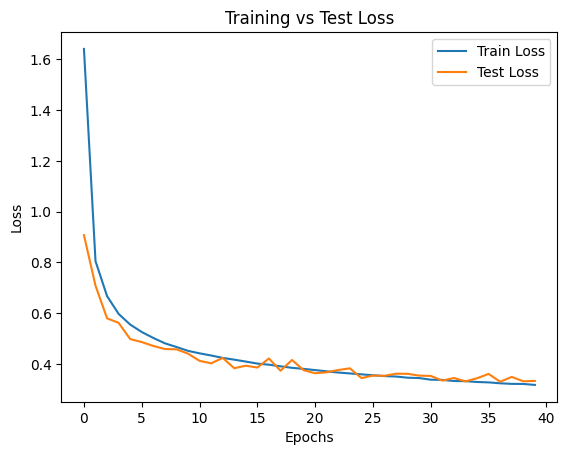

In [ ]:
train_losses = []
test_losses = []

new_epochs = 40 # and increased epochs

for e in range(new_epochs):
    running_loss = 0
    correct = 0
    total = 0
    total_loss = 0

    # Training the model
    new_model.train()
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        new_optimizer.zero_grad()
        output = new_model(images)
        loss = new_criterion(output, labels)

        # Calculating L2 regularization loss
        l2_reg = 0
        for param in new_model.parameters():
            l2_reg += torch.norm(param, 2)

        loss += 0.001 * l2_reg # with the regularization strength
        loss.backward()
        new_optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Testing the model
    with torch.no_grad():
      for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        output = new_model(images)
        loss = new_criterion(output, labels)
        total_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_loss = total_loss / len(testloader)
    test_losses.append(test_loss)

    print(f"Epoch {e+1}/{new_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plotting the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Test Loss')
plt.show()


# Part E

In [ ]:
transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load training data with the defined transformations
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# Normalized test data without data augmentation
test_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
testset = datasets.FashionMNIST('./data', download=True, train=False, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
# new model with Data Augmentation, Regularization, and Dropout
new_input_size = 784
new_out_size = 10

class RegularizedModel(nn.Module):
    def __init__(self):
        super(RegularizedModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(new_input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3) # dropout added after first layer

        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3) # dropout added after second layer

        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3) # dropout added after third layer

        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()

        self.fc5 = nn.Linear(64, new_out_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        x = self.relu4(x)

        x = self.fc5(x)
        return x

new_model = RegularizedModel()
new_criterion = nn.CrossEntropyLoss()
new_optimizer = optim.SGD(new_model.parameters(), lr=0.01, weight_decay=0.001) # with weight decay(L2)


Epoch 1/40, Train Loss: 1.9316, Test Loss: 1.2651
Epoch 2/40, Train Loss: 1.1135, Test Loss: 0.8992
Epoch 3/40, Train Loss: 0.8608, Test Loss: 0.7546
Epoch 4/40, Train Loss: 0.7540, Test Loss: 0.6722
Epoch 5/40, Train Loss: 0.6935, Test Loss: 0.6258
Epoch 6/40, Train Loss: 0.6518, Test Loss: 0.5926
Epoch 7/40, Train Loss: 0.6237, Test Loss: 0.5658
Epoch 8/40, Train Loss: 0.5979, Test Loss: 0.5432
Epoch 9/40, Train Loss: 0.5799, Test Loss: 0.5336
Epoch 10/40, Train Loss: 0.5616, Test Loss: 0.5379
Epoch 11/40, Train Loss: 0.5486, Test Loss: 0.5153
Epoch 12/40, Train Loss: 0.5385, Test Loss: 0.5144
Epoch 13/40, Train Loss: 0.5265, Test Loss: 0.4973
Epoch 14/40, Train Loss: 0.5239, Test Loss: 0.4885
Epoch 15/40, Train Loss: 0.5121, Test Loss: 0.4857
Epoch 16/40, Train Loss: 0.5056, Test Loss: 0.4798
Epoch 17/40, Train Loss: 0.4998, Test Loss: 0.4652
Epoch 18/40, Train Loss: 0.4921, Test Loss: 0.4625
Epoch 19/40, Train Loss: 0.4852, Test Loss: 0.4505
Epoch 20/40, Train Loss: 0.4799, Test Lo

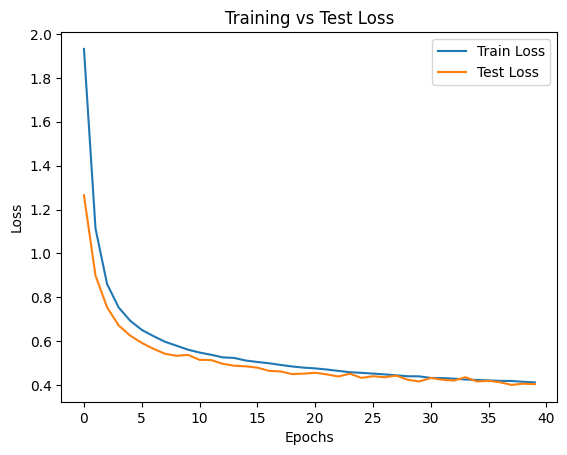

In [ ]:
train_losses = []
test_losses = []

new_epochs = 40 # and increased epochs

for e in range(new_epochs):
    running_loss = 0
    correct = 0
    total = 0
    total_loss = 0

    # Training the model
    new_model.train()
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        new_optimizer.zero_grad()
        output = new_model(images)
        loss = new_criterion(output, labels)

        # Calculating L2 regularization loss
        l2_reg = 0
        for param in new_model.parameters():
            l2_reg += torch.norm(param, 2)

        loss += 0.001 * l2_reg # with the regularization strength
        loss.backward()
        new_optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Testing the model
    with torch.no_grad():
      for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        output = new_model(images)
        loss = new_criterion(output, labels)
        total_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_loss = total_loss / len(testloader)
    test_losses.append(test_loss)

    print(f"Epoch {e+1}/{new_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plotting the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Test Loss')
plt.show()